# Introduction
In a facebook group I'm a member of devoted to skepticism, there was a very stupid debate over whether or not muslims or the muslim world has contributed significantly to science recently. There was very little data involved so I thought that I could get some data and do a little analysis to find out if muslim majority countries are doing worse on academic publications per capita than would be expected if we also take into account GDP per capita, political freedom and Human Development Index.

In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
from pandas.tools import plotting
from scipy import stats
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')

/home/hanbre/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Read dataframes:
First a dataframe containing the total number of publications per capita in the period 1993-2012 [1], the GDP (PPP) per capita in 2016 [2], the Freedom in the world index for 2012[3] and HDI for 2012[4].

The second data frame is a list of muslim majority countries[5].

In [3]:
data = pd.read_excel('pubs_per_capita_gdp.xlsx')
countries = pd.read_excel('muslim_majority_countries.xlsx')

In [4]:
data.iloc[1:10,:] #print some data

,No,Country,Pubscap,GDPcap,Freedom,HDI
1,120.0,Albania,0.000488,11840.228,PF,0.759
2,115.0,Algeria,0.000668,15026.461,NF,0.737
3,189.0,Angola,0.000021,6844.433,NF,0.523
4,106.0,Antigua and Barbuda,0.000842,25156.545,F,0.781
5,65.0,Argentina,0.002880,20047.489,F,0.823
6,60.0,Armenia,0.003154,8620.975,PF,0.736
7,10.0,Australia,0.030136,48899.123,F,0.933
8,16.0,Austria,0.025388,48004.660,F,0.887
9,109.0,Azerbaijan,0.000804,17438.590,NF,0.745


## Add muslim majority status to data

In [5]:
mmc = countries.iloc[:,0]
mm = [c in mmc.values for c in data.iloc[:,1]]
data['muslim_majority']=mm

In [14]:
data.iloc[1:10,:] #Print some of the data

,No,Country,Pubscap,GDPcap,Freedom,HDI,muslim_majority
1,120.0,Albania,0.000488,11840.228,PF,0.759,True
2,115.0,Algeria,0.000668,15026.461,NF,0.737,True
3,189.0,Angola,0.000021,6844.433,NF,0.523,False
4,106.0,Antigua and Barbuda,0.000842,25156.545,F,0.781,False
5,65.0,Argentina,0.002880,20047.489,F,0.823,False
6,60.0,Armenia,0.003154,8620.975,PF,0.736,False
7,10.0,Australia,0.030136,48899.123,F,0.933,False
8,16.0,Austria,0.025388,48004.660,F,0.887,False
9,109.0,Azerbaijan,0.000804,17438.590,NF,0.745,True


# Make labeled scatter plot. Purple markers are muslim majority

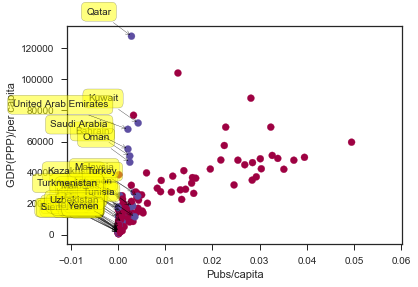

In [7]:
labels = data.iloc[:,1]

plt.scatter(data.iloc[:, 2], data.iloc[:, 3], marker='o', c=data['muslim_majority'], cmap=plt.get_cmap('Spectral'))

for label, x, y in zip(labels, data.iloc[:, 2], data.iloc[:, 3]):
    if label in mmc.values:
        plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.xlabel('Pubs/capita')
plt.ylabel('GDP(PPP)/per capita')
plt.show()

# Make linear regression model incorporating GDP, freedom index and muslim majority status
Model: pubs/capita ~ GDP (PPP)/capita + muslim majority status + Freedom in the world status

In [12]:
model = ols("Pubscap ~ GDPcap + HDI + C(muslim_majority) + C(Freedom)",data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Pubscap   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     37.79
Date:                Thu, 16 Nov 2017   Prob (F-statistic):           1.61e-25
Time:                        14:21:02   Log-Likelihood:                 598.19
No. Observations:                 167   AIC:                            -1184.
Df Residuals:                     161   BIC:                            -1166.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

# Interpretation
Pubs per capita is positively influenced by GDP/capita and HDI and negatively influenced by being less free. It is also negaitvely influenced by a country being muslim majority, but this influence is not statistically significant. Adding HDI and political freedom inproved the model fit. 

# ANOVA

In [13]:
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(muslim_majority),0.000094,1.0,2.008443,0.158358
C(Freedom),0.000540,2.0,5.740106,0.003908
GDPcap,0.001153,1.0,24.520384,0.000002
HDI,0.000284,1.0,6.039271,0.015051
Residual,0.007568,161.0,NaN,NaN


# References
[1]https://academia.stackexchange.com/questions/18767/research-publications-per-capita

[2]http://www.imf.org/external/pubs/ft/weo/2017/01/weodata/index.aspx

[3]https://freedomhouse.org/report-types/freedom-world

[4]http://hdr.undp.org/en/data#

[5]https://web.archive.org/web/20110202124356/http://features.pewforum.org:80/muslim-population/